<a href="https://colab.research.google.com/github/RashmiThakre/Cognifyz-Tasks/blob/main/TASK3_level2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install folium
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
from sklearn.cluster import KMeans
from shapely.geometry import Point


In [ ]:
df= pd.read_csv('/content/Dataset .csv')

In [ ]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [ ]:
center_lat = df['Latitude'].mean()
center_lon = df['Longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)


In [ ]:
for idx, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Restaurant Name']
    ).add_to(m)


In [ ]:
# Display the map
m

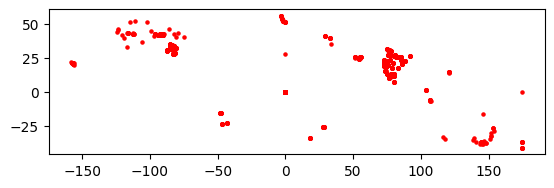

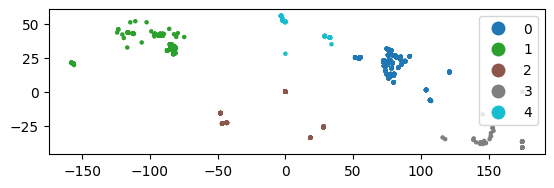

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.plot(marker='o', color='red', markersize=5)
plt.show()
coords = df[['Latitude', 'Longitude']].values
kmeans = KMeans(n_clusters=5, random_state=0).fit(coords)
df['cluster'] = kmeans.labels_
gdf['cluster'] = df['cluster']
gdf.plot(column='cluster', categorical=True, legend=True, markersize=5)
plt.show()